# Sentiment Prediction Using Deep Learning - Artificial Neural Network

In this section, I want to create a Artificial Neural Network (ANN), train, and test it on a dataset retrieved from https://www.kaggle.com/ankurzing/sentiment-analysis-for-financial-news/kernels. This ANN will then fitted to the all 3 given datasets (CNBC, Reuters, and the Guardian) to evaluate whether the headline/preview is positive, neutral, or negative.

In [1]:
import sys
sys.path.insert(0, './lib')
import pandas as pd
import numpy as np
from keras.utils import np_utils
from sentiment_module import tokenize_stem

import sys
sys.path.insert(0, './lib')
import pandas as pd
import numpy as np
from keras.utils import np_utils
from sentiment_module import tokenize_stem

df = pd.read_csv("./data/dataset.csv", header = None, encoding='latin-1', names=["Sentiment", "Headlines"])
df['Sentiment'] = df['Sentiment'].replace("negative",0).replace("neutral",1).replace("positive",2)

corpus = []
for item in df['Headlines']:
    corpus.append(tokenize_stem(item))

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 0].values
%store cv

[nltk_data] Downloading package stopwords to C:\Users\Long's
[nltk_data]     XPS13\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stored 'cv' (CountVectorizer)


In [2]:
print(X.shape)
print(y.shape)

(4846, 6679)
(4846,)


In [3]:
# transform column y to categorical data
y = np_utils.to_categorical(y, num_classes=3)

In [4]:
# Splitting into training sets and validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from keras.utils import np_utils

model = Sequential()
model.add(Dense(128, input_dim=(X_train.shape[1]), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
122/122 [==============================] - 1s 5ms/step - loss: 0.9265 - accuracy: 0.5810
Epoch 2/20
122/122 [==============================] - 1s 5ms/step - loss: 0.6091 - accuracy: 0.7085
Epoch 3/20
122/122 [==============================] - 1s 4ms/step - loss: 0.3682 - accuracy: 0.8367
Epoch 4/20
122/122 [==============================] - 1s 5ms/step - loss: 0.2244 - accuracy: 0.8940
Epoch 5/20
122/122 [==============================] - 1s 5ms/step - loss: 0.1131 - accuracy: 0.9628
Epoch 6/20
122/122 [==============================] - 1s 5ms/step - loss: 0.0703 - accuracy: 0.9765
Epoch 7/20
122/122 [==============================] - 1s 5ms/step - loss: 0.0504 - accuracy: 0.9825
Epoch 8/20
122/122 [==============================] - 1s 5ms/step - loss: 0.0409 - accuracy: 0.9850
Epoch 9/20
122/122 [==============================] - 1s 5ms/step - loss: 0.0348 - accuracy: 0.9863
Epoch 10/20
122/122 [==============================] - 1s 5ms/step - loss: 0.0292 - accuracy: 0.9876

In [6]:
model.evaluate(x=X_test, y=y_test, batch_size=None, verbose=1, sample_weight=None)

31/31 [==============================] - 0s 2ms/step - loss: 2.2041 - accuracy: 0.7062


[2.2040929794311523, 0.7061855792999268]

## CNBC Headlines and Previews

### Predicting

In [7]:
%store -r df1
from sentiment_module import tokenize_stem

# Headlines
corpus_hl1 = []
for item in df1['Headlines']:
    corpus_hl1.append(tokenize_stem(item))
pred_hl1 = cv.transform(corpus_hl1).toarray()
y_pred_hl1 = model.predict(pred_hl1)

In [8]:
y_pred_hl1[0:10]

array([[1.4411462e-06, 3.8350117e-01, 6.1649740e-01],
       [2.2818391e-08, 9.8701990e-01, 1.2980120e-02],
       [1.0614721e-08, 9.8923689e-01, 1.0763101e-02],
       [2.7244261e-11, 9.9751723e-01, 2.4828131e-03],
       [1.1113579e-18, 9.9996281e-01, 3.7242069e-05],
       [4.9714004e-08, 9.8430043e-01, 1.5699612e-02],
       [4.0167653e-15, 9.9971849e-01, 2.8155104e-04],
       [3.2499394e-14, 9.9952829e-01, 4.7174963e-04],
       [1.2882377e-12, 9.9883014e-01, 1.1698100e-03],
       [3.0270574e-08, 9.8609155e-01, 1.3908453e-02]], dtype=float32)

In [9]:
print(y_pred_hl1.shape)

(2790, 3)


In [10]:
# Descriptions/Previews
corpus_ds1 = []
for item in df1['Description']:
    corpus_ds1.append(tokenize_stem(item))
pred_ds1 = cv.transform(corpus_ds1).toarray()
y_pred_ds1 = model.predict(pred_ds1)

In [11]:
y_pred_ds1[0:10]

array([[4.29914548e-09, 5.50824463e-01, 4.49175566e-01],
       [1.89538099e-04, 9.34876243e-06, 9.99801099e-01],
       [3.68862996e-10, 9.95283306e-01, 4.71672183e-03],
       [4.88387824e-18, 9.99946356e-01, 5.36767147e-05],
       [5.15047577e-06, 1.59733471e-08, 9.99994874e-01],
       [1.89538099e-04, 9.34876243e-06, 9.99801099e-01],
       [1.23069860e-10, 6.80210948e-01, 3.19788963e-01],
       [1.52714492e-03, 1.98733815e-05, 9.98453021e-01],
       [3.10440726e-07, 1.24391895e-02, 9.87560570e-01],
       [1.73268013e-03, 3.03162706e-05, 9.98237014e-01]], dtype=float32)

### Headlines Clustering

In [12]:
# K-Means Clustering
X = y_pred_hl1
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans[0:100]

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2])

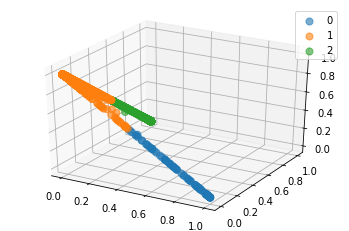

In [14]:
from cluster_plotting import clusterplot_3d #customed function
clusterplot_3d(X, y_kmeans)

In [ ]:
# 2 is neutral, 1 is positive, 0 is negative in this scenario

In [15]:
# Hierarchical Clustering
X = y_pred_hl1
from sklearn.cluster import AgglomerativeClustering
hc3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc3 = hc3.fit_predict(X)
y_hc3[0:100]

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0], dtype=int64)

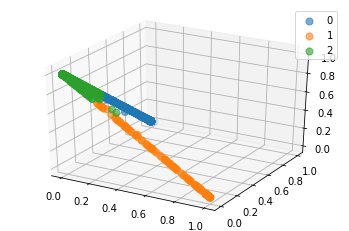

In [16]:
clusterplot_3d(X, y_hc3)

In [ ]:
# 0 is neutral, 2 is positive, 1 is negative in this scenario

### Description Clustering

In [17]:
# K-Means Clustering
X = y_pred_ds1
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans[0:100]

array([1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2,
       1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1, 2, 1, 2,
       1, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 1])

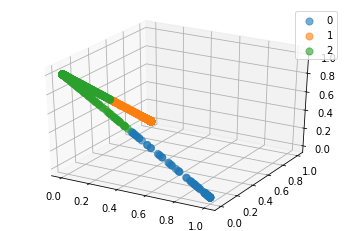

In [18]:
clusterplot_3d(X, y_kmeans)

In [22]:
# 2 is positive, 1 is neutral, 0 is negative in this scenario
y_pred_ds1[0:10]

array([[4.29914548e-09, 5.50824463e-01, 4.49175566e-01],
       [1.89538099e-04, 9.34876243e-06, 9.99801099e-01],
       [3.68862996e-10, 9.95283306e-01, 4.71672183e-03],
       [4.88387824e-18, 9.99946356e-01, 5.36767147e-05],
       [5.15047577e-06, 1.59733471e-08, 9.99994874e-01],
       [1.89538099e-04, 9.34876243e-06, 9.99801099e-01],
       [1.23069860e-10, 6.80210948e-01, 3.19788963e-01],
       [1.52714492e-03, 1.98733815e-05, 9.98453021e-01],
       [3.10440726e-07, 1.24391895e-02, 9.87560570e-01],
       [1.73268013e-03, 3.03162706e-05, 9.98237014e-01]], dtype=float32)

In [20]:
# Hierarchical Clustering
X = y_pred_ds1
from sklearn.cluster import AgglomerativeClustering
hc3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc3 = hc3.fit_predict(X)
y_hc3[0:100]

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0], dtype=int64)

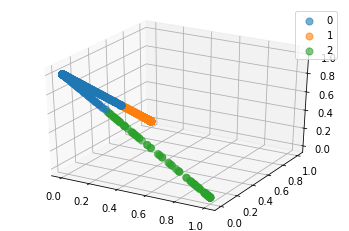

In [21]:
clusterplot_3d(X, y_hc3)

In [ ]:
# 0 is positive, 1 is neutral, 2 is negative in this scenario